# Predicting activators of TTR transcripption using 13C NMR spectroscopy data and atomic data porvided by PubChem with PCA

## Content   <a name="content"></a>

1. [Upload and process C13 NMR spectroscopy data](#1)
2. [Upload atomic data provided by PubChem](#2)
3. [Create a dataframe merging the C13 NMR data frames,PubChem atomic data and the labels](#3)
4. [Create a data frame merging the compound data to the data, holding the labels](#4)
5. [Ensure an equal number of classes in the test sets](#5)
6. [Scaling](#6)
7. [Balancing](#7)
8. [PCA](#8)
9. [Machine Learning](#9)
10. [Five-fold cross validation](#10)
11. [Scrutinise for overfitting of the MLmodel with default hyperparameter values (kernel='rbf', C=1.0, gamma=’scale’)](#11)
12. [Hyperparameter tuned by Optuna](#12)
13. [Scrutinise for overfitting using hyperparameter tuned by Optuna](#13)

## Upload and analyse NMR spectroscopy data <a name="1"></a>

In [1]:
import pandas as pd 

# load the converted nmr dataset
df_C13 = pd.read_csv('output_C13.csv')

# To avoid truncation of some columns during data frame display
pd.set_option('display.max_columns', None) 

# Display the data frame
print('Shape of df_C13: ', df_C13.shape)
df_C13.head()

Shape of df_C13:  (3177, 301)


,SMILES,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,CC1=C(C=C(C=C1)Cl)NC(C#N)C2=CC=CC=C2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,1,2,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,C1CCC(CC1)CNC(=O)COC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C1=CSC(=C1)C(=O)NNC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CC1=CC(=CC=C1)C(=O)NC2=C(C=NN2C3=CC=CC=C3)C(=O...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,COC(=O)C1=CC=C(C=C1)NC2=C(C3=NON=C3C=C2)[N+](=...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,1,0,

In [2]:
# Identify columns with only zeros
columns_to_drop = df_C13.columns[df_C13.eq(0).all()]

In [3]:
# Drop the columns
df_C13 = df_C13.drop(columns_to_drop, axis=1)

In [4]:
# Display the data frame
print('Shape of df_C13: ', df_C13.shape)
df_C13.head()

Shape of df_C13:  (3177, 209)


,SMILES,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,210,211,222
0,CC1=C(C=C(C=C1)Cl)NC(C#N)C2=CC=CC=C2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,1,2,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,C1CCC(CC1)CNC(=O)COC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,C1=CSC(=C1)C(=O)NNC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CC1=CC(=CC=C1)C(=O)NC2=C(C=NN2C3=CC=CC=C3)C(=O...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,COC(=O)C1=CC=C(C=C1)NC2=C(C3=NON=C3C=C2)[N+](=...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


[<a href="#content">Back to top</a>]

## Upload atomic data provided by PubChem <a name="2"></a>

In [5]:
# load the dataset with targets
df_pubChem = pd.read_csv('PubChem_data.csv', sep=";")

# Display the data frame
print('Shape of data frame: ', df_pubChem.shape)
df_pubChem.head()

Shape of data frame:  (3175, 9)


,CID,MW,TPSA,XL,HAC,DON,ACC,ROT,SMILES
0,2732646,256.73,35.8,4.4,18.0,1.0,2.0,3.0,CC1=C(C=C(C=C1)Cl)NC(C#N)C2=CC=CC=C2
1,3325928,293.33,55.4,3.4,21.0,1.0,4.0,6.0,C1CCC(CC1)CNC(=O)COC(=O)C2=CC=C(C=C2)F
2,809167,264.28,86.4,2.5,18.0,2.0,4.0,2.0,C1=CSC(=C1)C(=O)NNC(=O)C2=CC=C(C=C2)F
3,700633,348.40,67.2,3.4,26.0,1.0,3.0,4.0,CC1=CC(=CC=C1)C(=O)NC2=C(C=NN2C3=CC=CC=C3)C(=O...
4,2836637,314.25,123.0,3.0,23.0,1.0,8.0,4.0,COC(=O)C1=CC=C(C=C1)NC2=C(C3=NON=C3C=C2)[N+](=...


In [6]:
df_pubChem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CID     3175 non-null   int64  
 1   MW      3119 non-null   float64
 2   TPSA    3119 non-null   float64
 3   XL      3041 non-null   float64
 4   HAC     3119 non-null   float64
 5   DON     3119 non-null   float64
 6   ACC     3119 non-null   float64
 7   ROT     3119 non-null   float64
 8   SMILES  3041 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 223.4+ KB


[<a href="#content">Back to top</a>]

## Create a dataframe merging the C13 NMR data frames and the atomic data provided by PubChem <a name="3"></a>

In [7]:
df_compounds = pd.merge( df_C13, df_pubChem, on='SMILES', how='inner')

# Display the data frame
print('Shape of df_compounds: ', df_compounds.shape)
df_compounds.head()

Shape of df_compounds:  (3041, 217)


,SMILES,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,210,211,222,CID,MW,TPSA,XL,HAC,DON,ACC,ROT
0,CC1=C(C=C(C=C1)Cl)NC(C#N)C2=CC=CC=C2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,1,2,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732646,256.73,35.8,4.4,18.0,1.0,2.0,3.0
1,C1CCC(CC1)CNC(=O)COC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3325928,293.33,55.4,3.4,21.0,1.0,4.0,6.0
2,C1=CSC(=C1)C(=O)NNC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,809167,264.28,86.4,2.5,18.0,2.0,4.0,2.0
3,CC1=CC(=CC=C1)C(=O)NC2=C(C=NN2C3=CC=CC=C3)C(=O...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,700633,348.40,67.2,3.4,26.0,1.0,3.0,4.0
4,COC(=O)C1=CC=C(C=C1)NC2=C(C3=NON=C3C=C2)[N+](=...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2836637,314.25,123.0,3.0,23.0,1.0,8.0,4.0


In [8]:
df_compounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Columns: 217 entries, SMILES to ROT
dtypes: float64(7), int64(209), object(1)
memory usage: 5.0+ MB


In [9]:
# df_pubChem.drop(columns=['TPSA', 'XL', 'DON', 'ACC', 'ROT'], axis=1, inplace=True)

## Create a data frame merging the compound data to the data, holding the labels  <a name="4"></a>

In [10]:
# load the dataset with targets
df_targets = pd.read_csv('input/targets.csv')

# Display the data frame
print('Shape of df_targets: ', df_targets.shape)
df_targets.head()

Shape of df_targets:  (3177, 2)


,SMILES,target
0,C1CN(CCC1(C#N)NC2=CC=CC=C2)CC3=CC=CC=C3,0
1,CC1=C(C=C(C=C1)[N+](=O)[O-])S(=O)(=O)NC2=CC=C(...,0
2,C1=CC=C2C(=C1)C(=CC(=N2)C3=CN=CC=C3)C(=O)NN=CC...,0
3,CC(C)N(CC1=CC=CC=C1)C(=S)NC2=CN=CC=C2,0
4,C1=CC=C(C(=C1)C(=O)NNC(=O)C2=CC=CC=C2[N+](=O)[...,0


In [11]:
df = pd.merge( df_compounds, df_targets, on='SMILES', how='inner')

In [12]:
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (3041, 218)


,SMILES,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,210,211,222,CID,MW,TPSA,XL,HAC,DON,ACC,ROT,target
0,CC1=C(C=C(C=C1)Cl)NC(C#N)C2=CC=CC=C2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,2,1,2,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2732646,256.73,35.8,4.4,18.0,1.0,2.0,3.0,0
1,C1CCC(CC1)CNC(=O)COC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3325928,293.33,55.4,3.4,21.0,1.0,4.0,6.0,0
2,C1=CSC(=C1)C(=O)NNC(=O)C2=CC=C(C=C2)F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,809167,264.28,86.4,2.5,18.0,2.0,4.0,2.0,0
3,CC1=CC(=CC=C1)C(=O)NC2=C(C=NN2C3=CC=CC=C3)C(=O...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,1,2,0,0,0,1,0,0,1,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,700633,348.40,67.2,3.4,26.0,1.0,3.0,4.0,1
4,COC(=O)C1=CC=C(C=C1)NC2=C(C3=NON=C3C=C2)[N+](=...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2836637,314.25,123.0,3.0,23.0,1.0,8.0,4.0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Columns: 218 entries, SMILES to target
dtypes: float64(7), int64(210), object(1)
memory usage: 5.1+ MB


In [14]:
df.drop(columns=['CID','SMILES'], axis=1, inplace=True)

In [15]:
unique_count = df['target'].unique()
print("The unique values in column 'target:", unique_count)

The unique values in column 'target: [0 1]


In [16]:
# # Drop rows with any NaN values
# df = df.dropna()

In [17]:
# Count each of the binary targets
df['target'].value_counts()

target
0    1948
1    1093
Name: count, dtype: int64

[<a href="#content">Back to top</a>]

## Ensure an equal number of classes in the test sets <a name="5"></a>

In [18]:
# Handle the part of target 1 in the test set 
df_1 = df[df['target']==1]

# Shuffle the resulting data set
df_1 = df_1.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

# Extract 2800 samples (10% of 28000 samples) of target 1 for the test set
df_1_test = df_1.iloc[:340]

# Assign the rest of target 1 for the train set
df_1_train = df_1.iloc[340:]

In [19]:
# Handle the part of target 0 in the test set 
df_0 = df[df['target']==0]

# Shuffle the resulting data set
df_0 = df_0.sample(
    frac = 1,        # Return entire dataframe
    random_state=1   # Make result reproducible
    ).reset_index(drop=True)

## Extract 2800 samples (10% of 28000 samples) of target 0 for the test set Extract 10% of target 1 for the test set
df_0_test = df_0.iloc[:340]

# Assign the rest of target 1 for the train set
df_0_train = df_0.iloc[340:]

In [20]:
# Create train and test dataframe for further manipulation 
train = pd.concat([df_0_train, df_1_train])
test = pd.concat([df_0_test, df_1_test])

In [21]:
# Create the sets for ML 
X_train = train.drop(columns='target' , axis=1)
y_train = train['target']

X_test =  test.drop(columns='target' , axis=1)
y_test = test['target']

In [22]:
# Create X and y datasets to use for cross-validation
X = pd.concat([X_train, X_test]) 
y = pd.concat([y_train, y_test]) 

In [23]:
# Check the number of classes in the y_test set
y_test.value_counts()

target
0    340
1    340
Name: count, dtype: int64

In [24]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (2361, 215)
X_test:   (680, 215)
y_train:  (2361,)
y_test:   (680,)


[<a href="#content">Back to top</a>]

## Scaling <a name="6"></a>

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (2361, 215)
X_test:   (680, 215)
y_train:  (2361,)
y_test:   (680,)


[<a href="#content">Back to top</a>]

## Balancing <a name="7"></a>

[(0, 1608), (1, 753)]


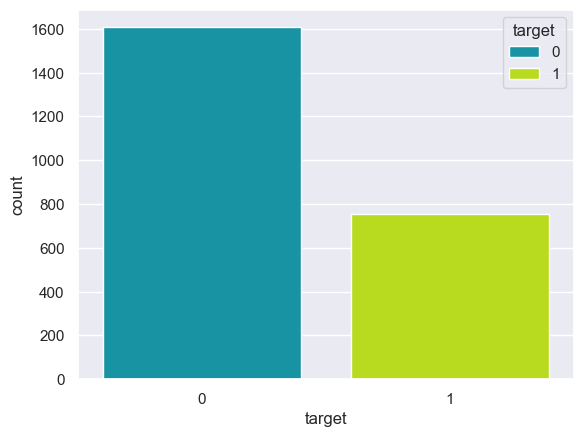

In [26]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Plot the imbalance between the targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train, palette='nipy_spectral')
plt.show()

[(0, 1608), (1, 1608)]


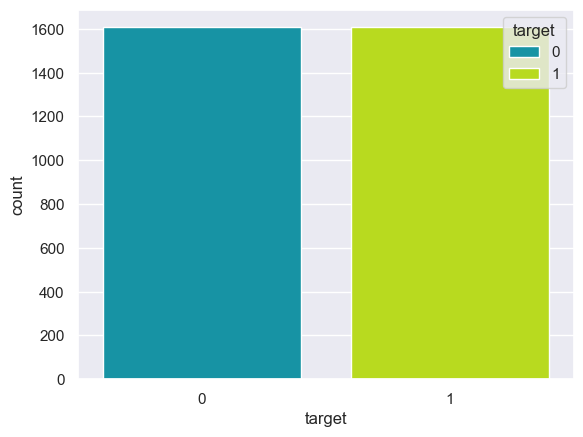

In [27]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

# Balance targets with Synthetic Minority Oversampling Technique
# smote = SMOTE(random_state=0)
ros = RandomOverSampler()

X_train, y_train = ros.fit_resample(X_train, y_train)

# Plot the balance between classification targets 
print(sorted(Counter(y_train).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_train, hue=y_train,palette='nipy_spectral')
plt.show()

In [28]:
# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (3216, 215)
X_test:   (680, 215)
y_train:  (3216,)
y_test:   (680,)


[<a href="#content">Back to top</a>]

## PCA <a name="8"></a>

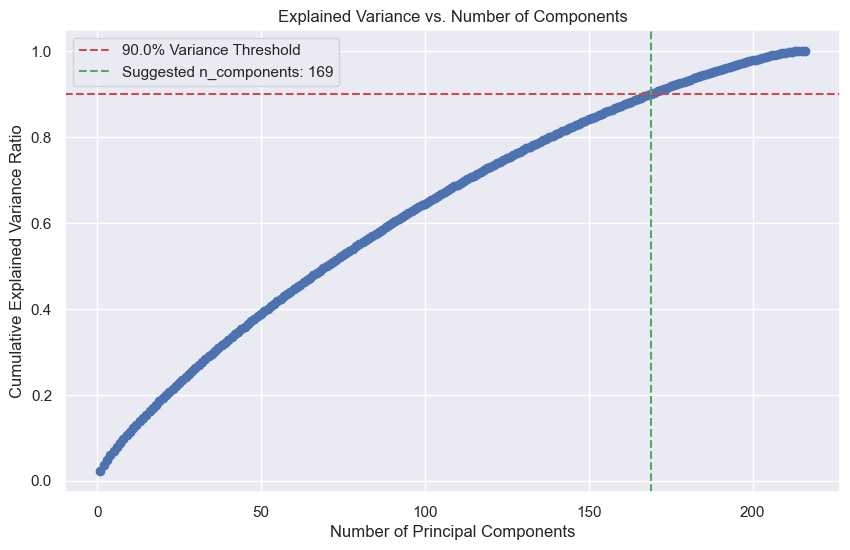


Suggested n_components (explained variance, 90%): 169
Minka's MLE suggests n_components = 215
Suggested n_components (MLE): 215


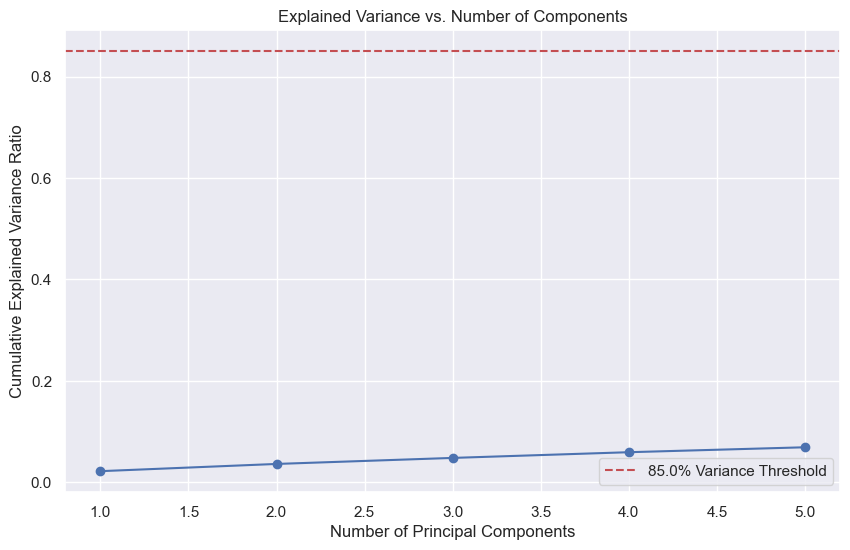

Suggested n_components (explained variance, 85%, max 5): None


In [29]:
import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def suggest_n_components_pca(data, method='explained_variance', variance_threshold=0.95, max_components=None):
    """
    Suggests the value of n_components for PCA based on different methods.

    Args:
        data (pd.DataFrame or np.ndarray): The input data (shape: n_samples, n_features).
        method (str, optional): The method to suggest n_components.
            - 'explained_variance': Suggests based on the cumulative explained variance ratio.
            - 'mle': Uses Minka's MLE to estimate the number of dimensions.
            Defaults to 'explained_variance'.
        variance_threshold (float, optional): The desired percentage of variance to retain
            (only used if method='explained_variance'). Defaults to 0.95.
        max_components (int, optional): The maximum number of components to consider.
            Defaults to the number of features in the data.

    Returns:
        int or None: The suggested value for n_components, or None if an error occurs.
    """
    if not isinstance(data, (pd.DataFrame, np.ndarray)):
        print("Error: Input data must be a Pandas DataFrame or a NumPy array.")
        return None

    data = np.array(data)
    n_features = data.shape[1]

    if max_components is None:
        max_components = n_features

    # Standardize the data before applying PCA
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    if method == 'explained_variance':
        pca = PCA(n_components=min(n_features, max_components))
        pca.fit(scaled_data)

        cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

        suggested_n = None
        for i, ratio in enumerate(cumulative_variance_ratio):
            if ratio >= variance_threshold:
                suggested_n = i + 1
                break

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
        plt.xlabel('Number of Principal Components')
        plt.ylabel('Cumulative Explained Variance Ratio')
        plt.title('Explained Variance vs. Number of Components')
        plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold*100}% Variance Threshold')
        if suggested_n is not None:
            plt.axvline(x=suggested_n, color='g', linestyle='--', label=f'Suggested n_components: {suggested_n}')
        plt.legend()
        plt.grid(True)
        plt.show()

        return suggested_n

    elif method == 'mle':
        pca_mle = PCA(n_components='mle')
        pca_mle.fit(scaled_data)
        suggested_n = pca_mle.n_components_
        print(f"Minka's MLE suggests n_components = {suggested_n}")
        return suggested_n

    else:
        print(f"Error: Invalid method '{method}'. Available methods are 'explained_variance' and 'mle'.")
        return None

# Suggest n_components based on explained variance (retaining 90% of variance)
suggested_components_ev = suggest_n_components_pca(df, method='explained_variance', variance_threshold=0.90)
print(f"\nSuggested n_components (explained variance, 90%): {suggested_components_ev}")

# Suggest n_components based on Minka's MLE
suggested_components_mle = suggest_n_components_pca(df, method='mle')
print(f"Suggested n_components (MLE): {suggested_components_mle}")

# Suggest n_components with a maximum limit
suggested_components_ev_limited = suggest_n_components_pca(df, method='explained_variance', variance_threshold=0.85, max_components=5)
print(f"Suggested n_components (explained variance, 85%, max 5): {suggested_components_ev_limited}")

In [30]:
from sklearn.decomposition import PCA

# Fit PCA on the training set
pca = PCA(n_components=1)  # Adjust n_components as needed
pca.fit(X_train)

# Transform both training and test sets
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (3216, 1)
X_test:   (680, 1)
y_train:  (3216,)
y_test:   (680,)


## Machine Learning <a name="9"></a>

In [31]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the algorithms that will be used, placing them in a dictionary 
clfs = {"SVM":SVC(),
        "Decision":DecisionTreeClassifier(), 
        "RandomForest":RandomForestClassifier(), 
        "GradientBoost":GradientBoostingClassifier(),
        "K-nearest": KNeighborsClassifier(n_neighbors=3)}

In [32]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Create statistics with the results of training with different algorithms
def model_fit(clfs):
    fitted_model={}
    model_result = pd.DataFrame()
    # Iterate the clfs dictionary clfs
    for model_name, model in clfs.items():
        # Train the current model
        model.fit(X_train,y_train)
        # Add the current model name
        fitted_model.update({model_name:model})
        # Prediction of the current model 
        y_pred = model.predict(X_test)
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        # Calculate the metrics
        model_dict['2.Accuracy'] = round(accuracy_score(y_test, y_pred),3)
        model_dict['3.Precision'] = round(precision_score(y_test, y_pred),3)
        model_dict['4.Recall'] = round(recall_score(y_test, y_pred),3)
        model_dict['5.F1'] = round(f1_score(y_test, y_pred),3)
        model_dict['6.ROC'] = round(roc_auc_score(y_test, y_pred),3)
        model_result = model_result._append(model_dict,ignore_index=True)
    return fitted_model, model_result

# Run the function model_fit(clfs) 
fitted_model, model_result = model_fit(clfs)

# Display the results of the model_fit(clfs) function in a descending order
model_result.sort_values(by=['2.Accuracy'],ascending=False)

,1.Algorithm,2.Accuracy,3.Precision,4.Recall,5.F1,6.ROC
0,SVM,0.650,0.707,0.512,0.594,0.650
3,GradientBoost,0.604,0.625,0.521,0.568,0.604
4,K-nearest,0.534,0.536,0.503,0.519,0.534
1,Decision,0.519,0.528,0.359,0.427,0.519
2,RandomForest,0.519,0.528,0.359,0.427,0.519


[<a href="#content">Back to top</a>]

## Five-fold cross-validation  <a name="10"></a>

In [33]:
# Cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

# Create statistics with the results of the cross-validation of different estimators
def model_CV(clfs):
    estimated_model={}
    model_cv_result = pd.DataFrame()
    for model_name, model in clfs.items():
        estimated_model.update({model_name:model})
        scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
        model_dict = {}
        model_dict['1.Algorithm'] = model_name
        model_dict['2.Mean CV Score'] = round(scores.mean(), 4)
        model_dict['3.Standard Deviation'] = round(scores.std(), 4)
        model_dict['4.List of CV Scores'] = np.round(scores, 4)
        model_cv_result = model_cv_result._append(model_dict,ignore_index=True)
    return estimated_model, model_cv_result

# Run the model_CV(clsf) function
estimated_model, model_cv_result = model_CV(clfs)

# Display the results of cross_validation statistics in a descending order
model_cv_result.sort_values(by=['2.Mean CV Score'],ascending=False)

,1.Algorithm,2.Mean CV Score,3.Standard Deviation,4.List of CV Scores
3,GradientBoost,0.7172,0.0127,"[0.7061, 0.7023, 0.7138, 0.7352, 0.7286]"
2,RandomForest,0.7146,0.0099,"[0.7126, 0.7072, 0.7023, 0.7303, 0.7204]"
0,SVM,0.6952,0.0093,"[0.6847, 0.6891, 0.6908, 0.7007, 0.7105]"
4,K-nearest,0.6449,0.0203,"[0.6338, 0.6382, 0.6266, 0.6414, 0.6842]"
1,Decision,0.6090,0.0092,"[0.5944, 0.6102, 0.6168, 0.6036, 0.6201]"


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting of the Gradient Boosting Classifier with default values of the hyperparameters <a name="11"></a>

In [34]:
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 31)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = GradientBoostingClassifier(max_depth=i)
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.614, test: 0.643
>2, train: 0.648, test: 0.624
>3, train: 0.674, test: 0.604
>4, train: 0.738, test: 0.588
>5, train: 0.795, test: 0.590
>6, train: 0.841, test: 0.571
>7, train: 0.875, test: 0.546
>8, train: 0.910, test: 0.540
>9, train: 0.943, test: 0.544
>10, train: 0.947, test: 0.532
>11, train: 0.980, test: 0.528
>12, train: 0.982, test: 0.529
>13, train: 0.988, test: 0.522
>14, train: 0.993, test: 0.518
>15, train: 0.998, test: 0.521
>16, train: 0.999, test: 0.519
>17, train: 1.000, test: 0.519
>18, train: 1.000, test: 0.521
>19, train: 1.000, test: 0.519
>20, train: 1.000, test: 0.519
>21, train: 1.000, test: 0.519
>22, train: 1.000, test: 0.519
>23, train: 1.000, test: 0.519
>24, train: 1.000, test: 0.519
>25, train: 1.000, test: 0.519
>26, train: 1.000, test: 0.519
>27, train: 1.000, test: 0.519
>28, train: 1.000, test: 0.519
>29, train: 1.000, test: 0.519
>30, train: 1.000, test: 0.519


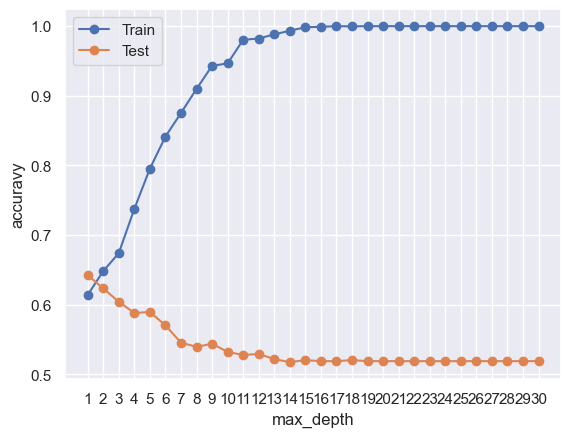

In [35]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

In [42]:
# Train the final model with the best hyperparameters
model = GradientBoostingClassifier(max_depth=2)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
acc = round(accuracy_score(y_test, y_pred),3)
print('Accuracy: ', acc)
pre = round(precision_score(y_test, y_pred),3)
print('Precision: ', pre) 
rec = round(recall_score(y_test, y_pred),3)
print('Recall: ',rec) 
f1 = round(f1_score(y_test, y_pred),3)
print('F1: ', f1) 
roc = round(roc_auc_score(y_test, y_pred),3) 
print('ROC: ', roc)

Accuracy:  0.624
Precision:  0.667
Recall:  0.494
F1:  0.568
ROC:  0.624


In [46]:
from sklearn.model_selection import KFold

model = GradientBoostingClassifier(max_depth=2)

# Define the cross-validation strategy on the *training* data only
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using the training data
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores (on training data):", scores)
print("Mean cross-validation score (on training data):", np.mean(scores))
print("Standard deviation of cross-validation score (on training data):", np.std(scores))

Cross-validation scores (on training data): [0.61801242 0.6251944  0.6096423  0.63297045 0.6096423 ]
Mean cross-validation score (on training data): 0.6190923756073531
Standard deviation of cross-validation score (on training data): 0.009051074920667404


[<a href="#content">Back to top</a>]

## Hyperparameter tuning with Optuna <a name="12"></a>

In [37]:
import optuna 

def objective(trial):
    """Objective function for Optuna to optimize."""

    # Define the hyperparameter search space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
    }

    # Create a Gradient Boosting Classifier with the suggested hyperparameters
    model = GradientBoostingClassifier(**params, random_state=42)

    # Perform cross-validation and return the mean accuracy
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3, scoring='accuracy')
    accuracy = score.mean()
    return accuracy

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100) # Adjust n_trials as needed

# Print the best hyperparameters and their corresponding accuracy
print("Best hyperparameters:", study.best_params)
print("Best accuracy:", study.best_value)

[I 2025-05-05 22:58:33,974] A new study created in memory with name: no-name-4a7ae9ab-30a6-4de8-9f9e-8f3efcc0db72
[I 2025-05-05 22:58:35,676] Trial 0 finished with value: 0.765547263681592 and parameters: {'n_estimators': 275, 'learning_rate': 0.28225274054064176, 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 8, 'subsample': 0.654476383954967, 'max_features': 'log2'}. Best is trial 0 with value: 0.765547263681592.
[I 2025-05-05 22:58:36,900] Trial 1 finished with value: 0.76181592039801 and parameters: {'n_estimators': 292, 'learning_rate': 0.24955784480218984, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 8, 'subsample': 0.5220049404959335, 'max_features': 'log2'}. Best is trial 0 with value: 0.765547263681592.
[I 2025-05-05 22:58:38,069] Trial 2 finished with value: 0.6333955223880597 and parameters: {'n_estimators': 135, 'learning_rate': 0.20522003419103907, 'max_depth': 3, 'min_samples_split': 17, 'min_samples_leaf': 7, 'subsample': 0.7871935329974344,

Best hyperparameters: {'n_estimators': 492, 'learning_rate': 0.2996660856421465, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 5, 'subsample': 0.6903840555809042, 'max_features': 'log2'}
Best accuracy: 0.7671019900497513


[<a href="#content">Back to top</a>]

## Scrutinise for overfitting of the model hyperparameter tuned by Optuna <a name="13"></a>

In [44]:
# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 20)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = GradientBoostingClassifier(max_depth=i,
                                   random_state=42, 
                                   n_estimators=492,
                                   learning_rate=0.2996660856421465,
                                   min_samples_split=6,
                                   min_samples_leaf=5,
                                   subsample=0.6903840555809042,
                                   max_features='log2')
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 1.000, test: 0.519
>2, train: 1.000, test: 0.519
>3, train: 1.000, test: 0.519
>4, train: 1.000, test: 0.519
>5, train: 1.000, test: 0.519
>6, train: 1.000, test: 0.519
>7, train: 1.000, test: 0.519
>8, train: 1.000, test: 0.519
>9, train: 1.000, test: 0.519
>10, train: 1.000, test: 0.519
>11, train: 1.000, test: 0.519
>12, train: 1.000, test: 0.519
>13, train: 1.000, test: 0.519
>14, train: 1.000, test: 0.519
>15, train: 1.000, test: 0.519
>16, train: 1.000, test: 0.519
>17, train: 1.000, test: 0.519
>18, train: 1.000, test: 0.519
>19, train: 1.000, test: 0.519


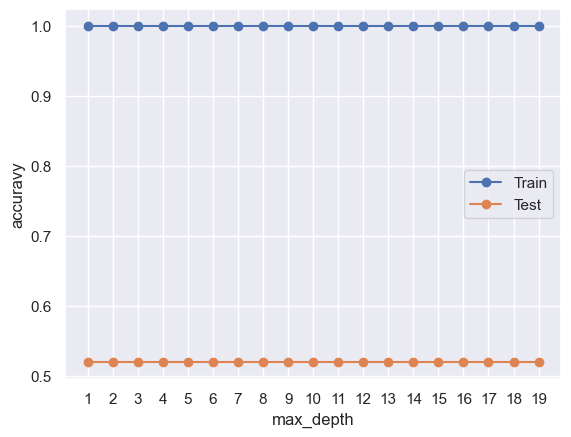

In [45]:
# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]